#                 **TANZANIAN WATER WELLS PREDICTION**

##### **Name**-Charity Mwangangi
##### **Student pace**-Part time
##### **TM**- Maryann Mwikali
##### **Phase 3 Project **

## **1.Business understanding Problem and Objective**

### Stateholder:Tanzanian NGO

### **Overview**

#### Tanzania faces significant challenges in providing consistent access to clean water for its citizens. With an estimated population of 70.5 million in mid‑2025, Tanzania remains one of Africa’s fastest-growing nations in terms of population and resource demand.

### **Business problem**
#### The client seeks insights into patterns distinguishing **functional** versus **non-functional or repair-needed wells**, to inform drilling strategies and maintenance priorities. The goal is to help villages avoid prolonged downtime and reduce socio-economic burdens especially on women and children, who are often tasked with collecting water.

### **Project objective**
#### Use the Pump It Up dataset (featuring features like pump type, installation year, payment method, and location) to build a **classification model** that:
#### - Predict well status in a **binary setup**: functional vs. needs attention (repair or non-functional).  
#### -  Identify the key features driving pump failures (e.g., pump type, installation year, management system).

### **Project goal/value**
#### Enables targeted maintenance, directing resources to at-risk wells before they fail.#### Reduces the socioeconomic burden of water insecurity by ensuring greaterhealth, education, and gender equity outcomes.

### **Data source**
#### DrivenData. (2015). Pump it Up: Data Mining the Water Table. Retrieved [Month Day Year] from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table.




###  2.Data loading and overview
#### 2.1.import libraries
#### These libraries will support data exploration, preprocessing, modeling, and evaluation:


In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

#### 2.2 Load dataset

In [ ]:
# train dataset
df_labels=pd.read_csv("Dataset/Training set labels.csv")
df_values=pd.read_csv("Dataset/Training set values.csv")

print("Labels:")
display(df_labels.head())

print("\nValues:")
display(df_values.head())

Labels:


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional



Values:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [71]:
#merge the two datasets using id
train_df = df_values.merge(df_labels, on='id')
display(train_df.head())
print("Combined shape:", train_df.shape)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Combined shape: (59400, 41)


In [72]:
#load test set
test_df = pd.read_csv('Dataset/Test set values.csv')



In [77]:
#combining train and test data for cleaning and preprocessing
#Add a flag so you can split them later
train_df['source'] = 'train'
test_df['source'] = 'test'
test_df['status_group'] = np.nan  # placeholder for label column

# Combine
df= pd.concat([train_df, test_df], axis=0)


In [74]:
#checking columns in our data
df.columns


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [78]:
#get data type of columns and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [79]:
def data_types(data):

    print("Our dataset has", len( data.select_dtypes(include='number').columns),
                "numeric columns")
    
    print("and", len(data.select_dtypes(include='object').columns),
          "categorical columns")
data_types(df) 

Our dataset has 10 numeric columns
and 31 categorical columns


### 3.1 Data cleaning and Preprocessing


#### a) Duplicates

In [80]:
#checking duplicates using a function
duplicates = []

def check_duplicates(data):

    """Function that iterates through the rows of our dataset to check whether they are duplicated or not"""
    
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_values = set(duplicates)
    if(len(duplicates_values) == 1):
        print('Our Dataset has no Duplicates')

    else:
        duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
        print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')
        

check_duplicates(df)

Our Dataset has no Duplicates


#### b) Missing values

In [81]:
#checking missing values
# Get total and percentage of missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print("Missing values in dataset:")
display(missing_df)



Missing values in dataset:


,Missing Values,Percentage
scheme_name,35258,47.485522
status_group,14850,20.000000
scheme_management,4846,6.526599
installer,4532,6.103704
funder,4504,6.065993
public_meeting,4155,5.595960
permit,3793,5.108418
subvillage,470,0.632997


### Scheme_name and Scheme Management
#### The main objective of this project is to analyze data in order to predict whether water wells in Tanzania are functional or non-functional. The features scheme_name and scheme_management provide information about the names of water supply schemes and their managing entities.However, these features are not expected to be strong predictors of well functionality.
#### In addition, both columns have approximately 47% missing values, which is nearly half of the dataset. Imputing these missing values would not only be difficult but also unlikely to add significant predictive power to the model.
#### Therefore we will drop them.

In [82]:
#dropping scheme name & scheme management.
df.drop(['scheme_name','scheme_management'], axis=1,inplace=True)

In [83]:
#preview shape after dropping
df.shape

(74250, 39)

### Funder
#### The funder feature contains the names of organizations or individuals who contributed to the installation of the wells, which could offer valuable insights for future partnerships and resource allocation.
#### However, this column has approximately 6% missing values. Since the proportion is relatively small and the information could be meaningful, we will drop only the rows with missing values in this column.

### Installer
#### This refers to contractors who are installing the wells.This would contribute much to our stakeholder on the best contractors to work with.
#### The  percentage of the missing values are not much ,we will therefore drop the rows with the missing values only.


##### The installer column also contains names of organizations or entities responsible for installing water wells. However, this column includes many inconsistencies due to:

- **Spelling errors** (e.g., `Distric Water Department` vs. `District Water Department`)
- **Variations in formatting** (e.g., `GOVERNMENT`, `Government`, `Governmen`)
- **Synonyms or partial names** representing the same entity

##### To clean this, we used a **dictionary mapping** approach. This method replaces all known variations and misspellings with a consistent, unified label.

In [84]:
# Dictionary of common replacements for installer names
installer_mapping = {
    # District Council
    'District Water Department': 'District water department',
    'District water depar': 'District water department',
    'Distric Water Department': 'District water department',
    
    # Fini Water
    'FinW': 'Fini Water',
    'Fini water': 'Fini Water',
    'FINI WATER': 'Fini Water',
    
    # Jaica
    'JAICA': 'Jaica',
    
    # District Council Variants
    'COUN': 'District council',
    'District COUNCIL': 'District council',
    'DISTRICT COUNCIL': 'District council',
    'District Counci': 'District council',
    'District Council': 'District council',
    'Council': 'District council',
    'Counc': 'District council',
    'District  Council': 'District council',
    'Distri': 'District council',
    
    # RC Church Variants
    'RC CHURCH': 'RC Church',
    'RC Churc': 'RC Church',
    'RC': 'RC Church',
    'RC Ch': 'RC Church',
    'RC C': 'RC Church',
    'RC CH': 'RC Church',
    'RC church': 'RC Church',
    'RC CATHORIC': 'RC Church',
    
    # Central Government Variants
    'Central Government': 'Central government',
    'Tanzania Government': 'Central government',
    'central government': 'Central government',
    'Cental Government': 'Central government',
    'Cebtral Government': 'Central government',
    'Tanzanian Government': 'Central government',
    'Tanzania government': 'Central government',
    'Centra Government': 'Central government',
    'CENTRAL GOVERNMENT': 'Central government',
    'TANZANIAN GOVERNMENT': 'Central government',
    'Central govt': 'Central government',
    'Centr': 'Central government',
    'Centra govt': 'Central government',
    
    # World Vision
    'World vision': 'World Vision',
    'World Division': 'World Vision',
    
    # Unicef
    'Unisef': 'Unicef',
    'UNICEF': 'Unicef',
    
    # DANIDA
    'DANID': 'DANIDA',
    
    # Villagers
    'villigers': 'villagers',
    'villager': 'villagers',
    'Villagers': 'villagers',
    'Villa': 'villagers',
    'Village': 'villagers',
    'Villi': 'villagers',
    'Village Council': 'villagers',
    'Village Counil': 'villagers',
    'Villages': 'villagers',
    'Vill': 'villagers',
    'Village community': 'villagers',
    'Villaers': 'villagers',
    'Village Community': 'villagers',
    'Villag': 'villagers',
    'Villege Council': 'villagers',
    'Village council': 'villagers',
    'Village  Council': 'villagers',
    'Villagerd': 'villagers',
    'Villager': 'villagers',
    'Village Technician': 'villagers',
    'Village Office': 'villagers',
    'Village community members': 'villagers',
    
    # Community
    'Commu': 'Community',
    'Communit': 'Community',
    'commu': 'Community',
    'COMMU': 'Community',
    'COMMUNITY': 'Community',
    
    # Government Variants
    'GOVERNMENT': 'Government',
    'GOVER': 'Government',
    'GOVERNME': 'Government',
    'GOVERM': 'Government',
    'GOVERN': 'Government',
    'Gover': 'Government',
    'Gove': 'Government',
    'Governme': 'Government',
    'Governmen': 'Government',
    
    # Other custom fixes
    'Hesawa': 'HESAWA',
    'Colonial Government': 'Colonial government',
    'Government of Misri': 'Misri Government',
    'Italy government': 'Italian government',
    'British colonial government': 'British government',
    'Concern /government': 'Concern/Government',
    'Village Government': 'Village government',
    'Government and Community': 'Government /Community',
    'Cetral government /RC': 'RC church/Central Gover',
    'Government /TCRS': 'TCRS /Government',
    'Government/TCRS': 'TCRS /Government',
    'ADRA /Government': 'ADRA/Government'
}

# Apply the replacements
df['installer'] = df['installer'].replace(installer_mapping)


### Public Meeting
#### Public meetings are a way of the community to come together and raise issues of concern. We will also just drop missing values of the column.

In [85]:
#drop missing values in funder,installer,public meeting
df = df.dropna(subset=['funder', 'installer', 'public_meeting'])

In [86]:
#preview shape
df.shape

(65780, 39)

## 4.Exploratory Data Analysis (EDA)

### 4.1 Binary Target Variable Creation and Class Distribution
#### To simplify the prediction task, have converted the original status_group target variable into a binary classification problem as per the objectives. Wells labeled as "functional" remain as is, while those labeled as "needs_repair" or "non-functional" were combined into a single "needs_attention" class.

In [87]:
# Create binary target variable
df['status_binary'] = df['status_group'].apply(lambda x: 'functional' if x == 'functional' else 'needs_attention')




#### Class Distribution

Number of wells per class:
needs_attention    37127
functional         28653
Name: status_binary, dtype: int64

Percentage distribution per class:
needs_attention    56.44
functional         43.56
Name: status_binary, dtype: float64


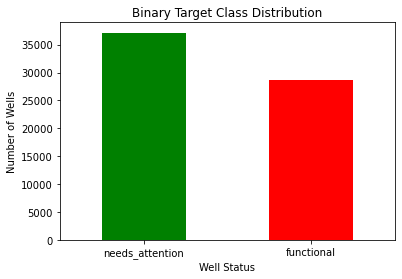

In [88]:
# Count how many rows in each class
class_counts = df['status_binary'].value_counts()
print("Number of wells per class:")
print(class_counts)

# Display the proportion (percentage) per class
class_proportions = df['status_binary'].value_counts(normalize=True) * 100
print("\nPercentage distribution per class:")
print(class_proportions.round(2))

# Plot the class distribution
class_counts.plot(kind='bar', color=['green', 'red'], title='Binary Target Class Distribution')
plt.xlabel('Well Status')
plt.ylabel('Number of Wells')
plt.xticks(rotation=0)
plt.show()

#### The dataset is fairly balanced with respect to the binary target classes:This shows that:
#### About 56.44% of wells are functional
#### About 43.56% need attention
#### This near-even split ensures that our model will have sufficient examples from both classes to learn meaningful patterns, reducing the risk of bias towards the majority class.

### 4.2 **Univariate Analysis (Categorical Features)**
#### Exploring key categorical variables to understand their distributions.

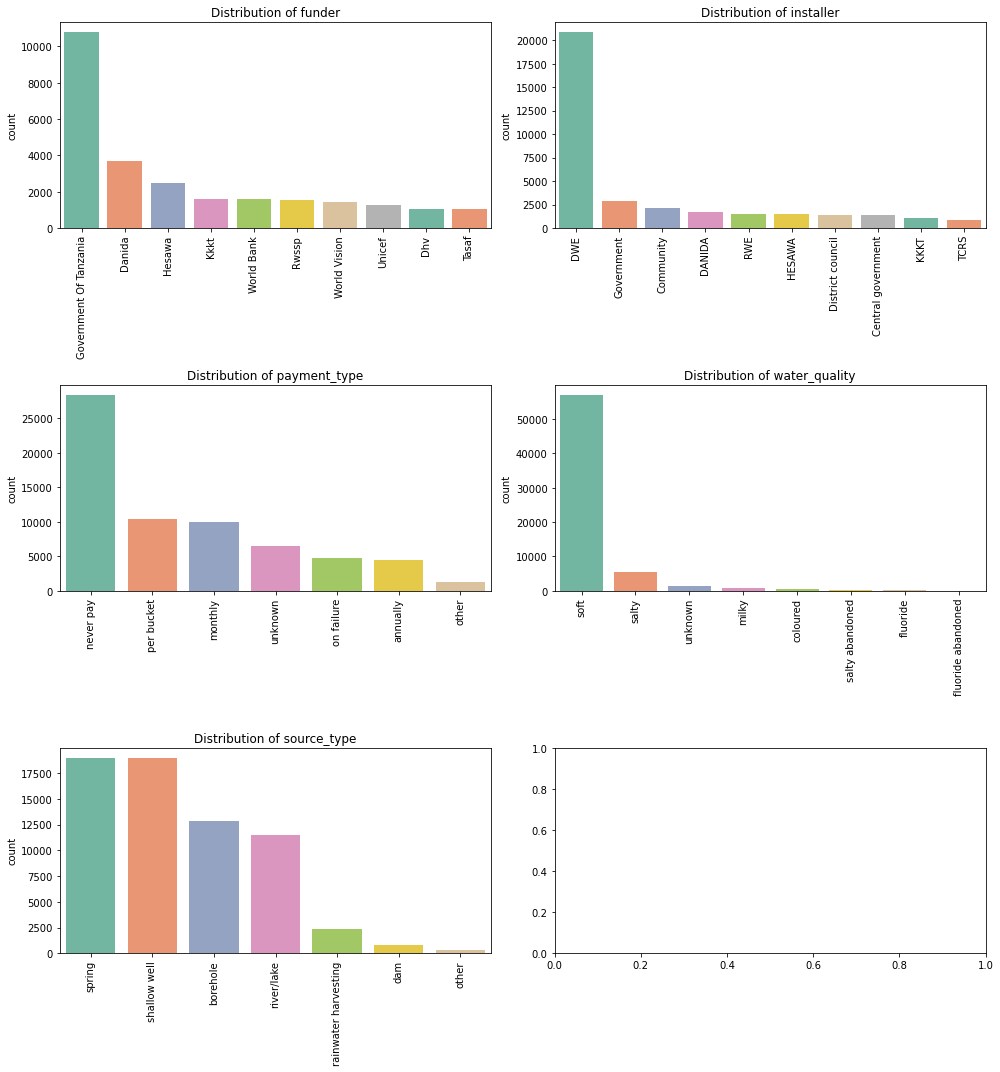

In [90]:
# visualizing Catogorical variables
# Drop ID column
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Categorical columns to visualize
categorical_cols = ['funder', 'installer', 'payment_type', 'water_quality', 'source_type']

# Setup the subplot grid
num_plots = len(categorical_cols)
cols = 2  
rows = (num_plots + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for i, col in enumerate(categorical_cols):
    top10 = df[col].value_counts().iloc[:10].index
    sns.countplot(data=df, x=col, order=top10, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

#### From the visualization of the categorical columns,it is clear that:
#### - **Funder:** Government of Tanzania funds the majority of wells.
#### - **Installer:** DWE is the most frequent installer — their wells' performance may be significant.
#### - **Payment Type:** Most wells are community-funded (free), suggesting non-commercial purpose.
#### - **Water Quality:** Majority use soft water relevant for assessing water safety.
#### - **Source Type:** Shallow wells, springs, and boreholes dominate, potentially influencing functionality.


### 4.3 Distribution of Numerical values
###  Checking outliers 

In [91]:
#checking outliers in numerical data using Interquartile range
#select numerical columns only
numerical_data=df.select_dtypes(include='number')


for col in numerical_data.columns:
    Q1 = numerical_data[col].quantile(0.25)
    Q3 = numerical_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Extract outlier rows
    outliers = df[(numerical_data[col] < lower_bound) | (numerical_data[col] > upper_bound)]

    print(f"Column: {col}")
    if not outliers.empty:
        print(outliers[[col]])
    else:
        print("No outliers found.")
    print("-" * 50)

Column: amount_tsh
       amount_tsh
0          6000.0
11          200.0
16          500.0
19          500.0
20          200.0
...           ...
14833      1000.0
14837       500.0
14838      3000.0
14842       600.0
14846      1000.0

[13485 rows x 1 columns]
--------------------------------------------------
Column: gps_height
No outliers found.
--------------------------------------------------
Column: longitude
       longitude
53           0.0
168          0.0
253          0.0
256          0.0
285          0.0
...          ...
14634        0.0
14649        0.0
14676        0.0
14766        0.0
14831        0.0

[1810 rows x 1 columns]
--------------------------------------------------
Column: latitude
No outliers found.
--------------------------------------------------
Column: num_private
       num_private
469             39
476              5
519             45
527              6
608              3
...            ...
14514            1
14538           39
14554           34
1464

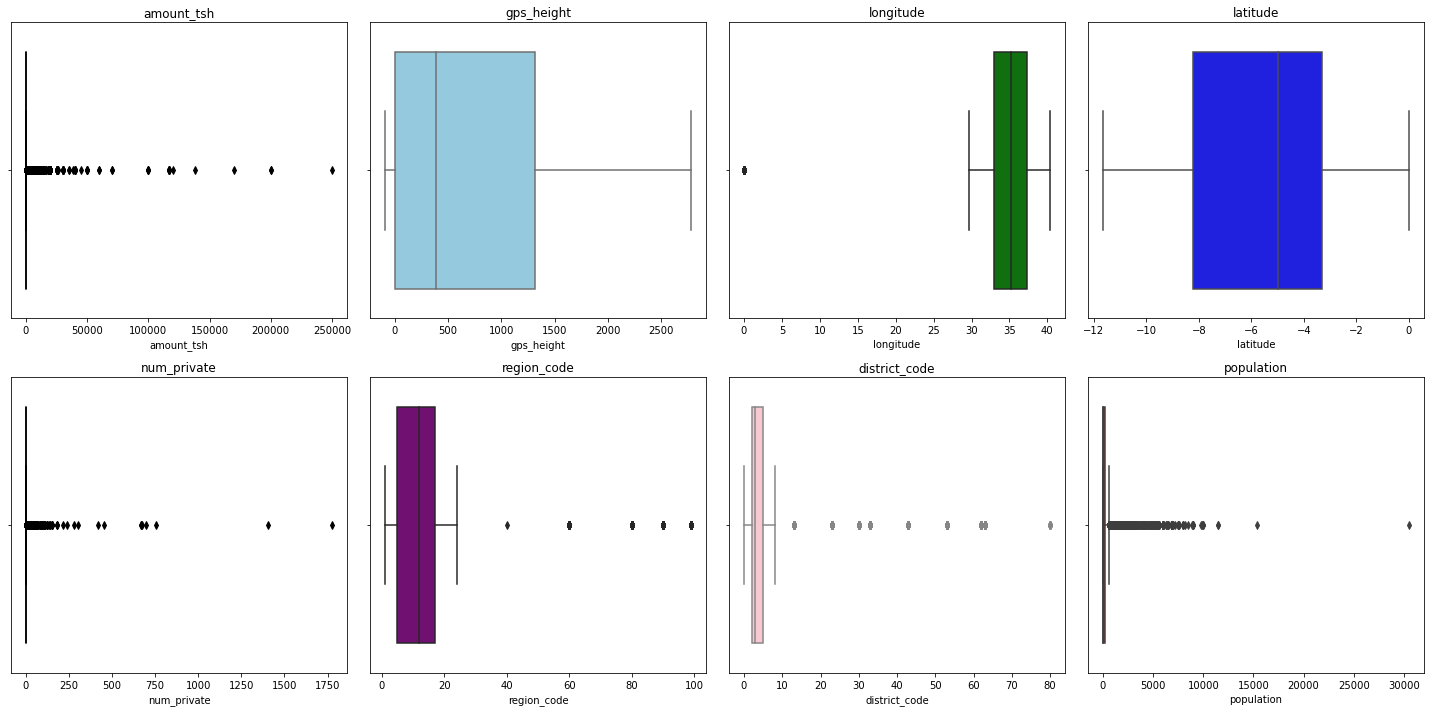

In [92]:
#Visualizating the outliers in our numerical data
def plt_boxplots(data,cols):
    fig, axes =plt.subplots(2,4, figsize=(20,10))
    axes=axes.ravel()
    

    colors=['black','skyblue','green','blue','black','purple','pink','brown','gray']

    for i,col in enumerate(cols[:8]):
        # convert the x-axis variable to a numeric data type
        
        data[col] = data[col].astype(float)
        sns.boxplot(x=data[col], ax=axes[i], color=colors[i])
        
        axes[i].set_title(col)
    plt.tight_layout()
cols = df.select_dtypes(include='number').columns

plt_boxplots(df, cols)



##### **Amount_tsh**-Highly skewed with many extreme outliers on the right.Most of the data concentrated near zero.outliers to be handled or use log transformation.
##### **gps height**-More symmetric distribution, but still shows some right-side outliers.
##### **construction year**-Relatively well-distributed with no strong outliers.Appears normally distributed with a peak near a central value.
##### **Population**-Very right-skewed — many outliers in high population areas.Most wells serve a small population, with a few outliers serving large communities.
##### **num_plate**-Highly skewed and sparse — almost all values are 0 or low.Presence of extreme outliers might be a low-importance feature.
##### **Region code** and **district code**-Both appear more categorical than numeric.to be ploted as barplot.



#### 4.3b Irrelevant columns
##### The following columns appear not to have relevant infomation towards our project,we will therefore  drop them:(**Permit,Subvillage,wpt_name,region_code,district_code,iga, ward,recorded_by and date_recorded**)


In [93]:
irrelevant_columns = ['permit', 'subvillage', 'wpt_name', 'region_code', 'district_code',
                      'lga', 'ward', 'recorded_by', 'date_recorded','num_private']

# Keep only those columns that are actually still in the DataFrame
columns_to_drop = [col for col in irrelevant_columns if col in df.columns]

# Drop the invalid columns
df.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped columns: {columns_to_drop}")
print(f"Current shape: {df.shape}")

Dropped columns: ['permit', 'subvillage', 'wpt_name', 'region_code', 'district_code', 'lga', 'ward', 'recorded_by', 'date_recorded', 'num_private']
Current shape: (65780, 29)


### 4.4 Relationship between Target variable and features

#### Categorical vs Target variable

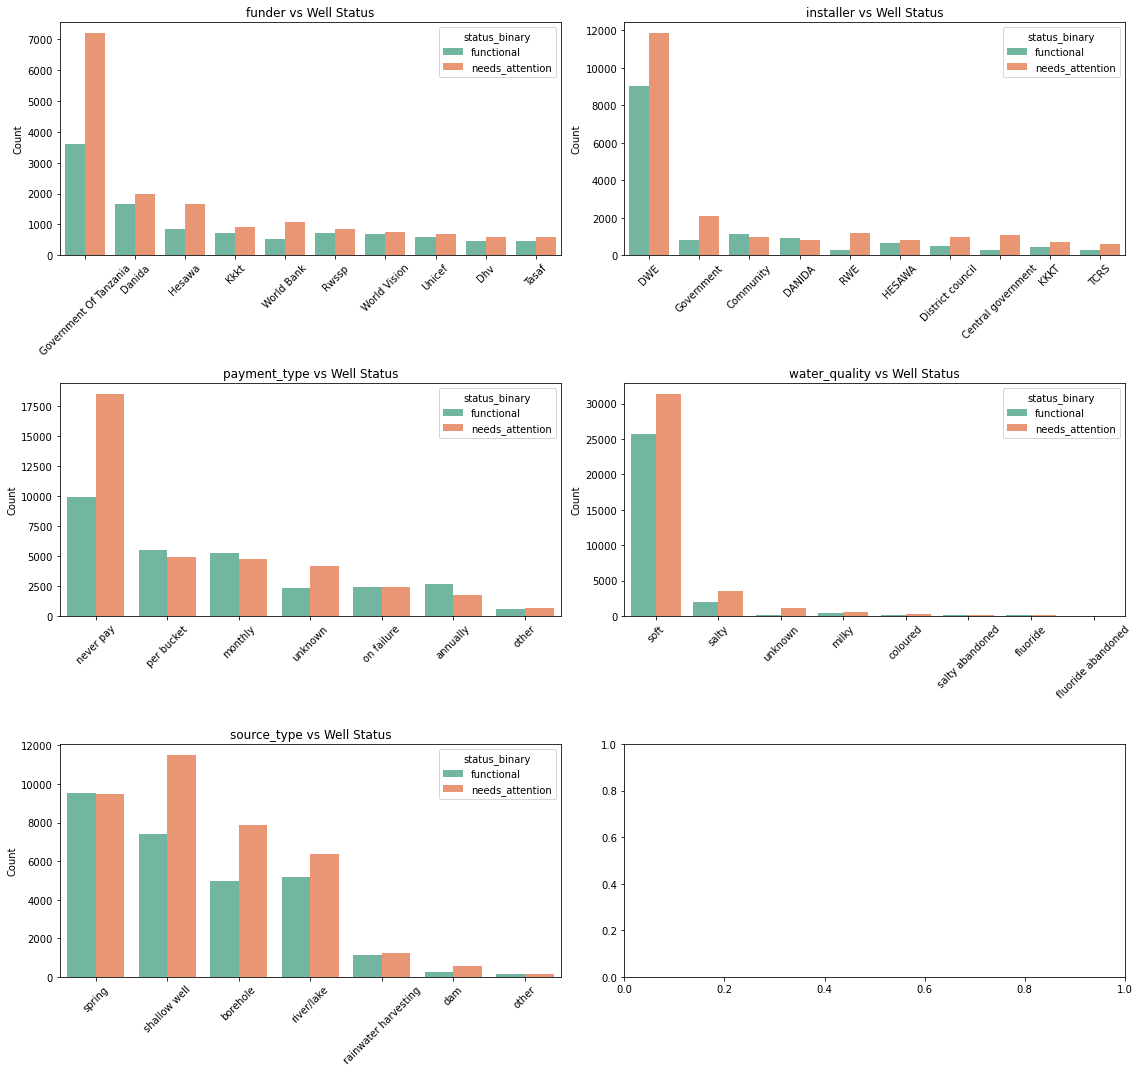

In [94]:

#Layout
n_cols =2
n_rows=(len(categorical_cols)+n_cols-1) // n_cols

# create figure
fig,axes=plt.subplots(n_rows, n_cols,figsize=(16,5 * n_rows))
axes=axes.flatten()

for i,col in enumerate(categorical_cols):
    top10 = df[col].value_counts().iloc[:10].index
    sns.countplot(data=df, x=col, hue='status_binary', order=top10, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} vs Well Status')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

#### From the visualization ,relationship between categorical vs target is as follows:
#### **Funder vs status** -Government of Tanzania funds the largest number of wells, but a higher portion of these wells need attention than are functional. Danida, Rwssp, and World Vision show a more balanced distribution, with relatively more functional wellsHesawa, Kkkt, and World Bank have a higher number of wells needing attention.
#### **Installer vs status**-DWE is by far the most common installer, with a large number of wells both functional and needing attention.
#### **Payment vs status**-"Never pay" is the most common and has high failure."Per bucket" and "monthly" payments align more with functional wells, possibly reflecting better maintenance via community investment.
### **water Quality vs Status**-Wells with soft water are more likely to be functional.wells with salty or milky water show higher need for attention.
#### **Source type vs status** -Spring and river/lake sources show better functionality.Shallow wells and boreholes are more prone to needing attention.



### 4.5 Numerical vs Target variable

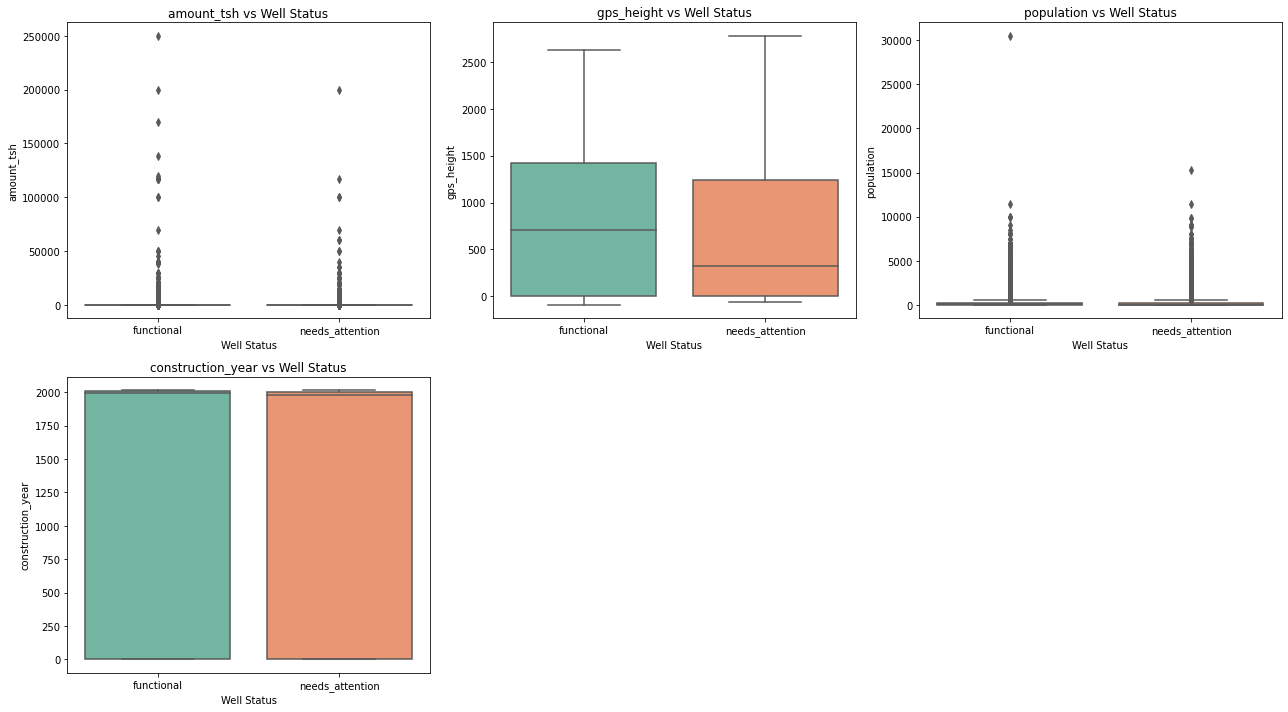

In [95]:
# Select only key numeric features for comparison
selected_numeric_cols = ['amount_tsh', 'gps_height', 'population', 'construction_year']
# layout
num_features = len(selected_numeric_cols)
cols_per_row = 3
rows = (num_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(selected_numeric_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(data=df, x='status_binary', y=col, palette='Set2')
    plt.title(f'{col} vs Well Status')
    plt.xlabel('Well Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


#### **

### 5.Preprocessing


### 5.1 Log transformation for skewed numerical features
#### amount_tsh and population are highly skewed.applying log transformation will compress the scale for a better model.

In [96]:
# Log transform skewed features
df['amount_tsh_log'] = np.log1p(df['amount_tsh'])
df['population_log'] = np.log1p(df['population'])


In [97]:
#Drop original amount_tsh and population
df.drop(['amount_tsh', 'population'], axis=1, inplace=True)


### 5.3 Construction year to Well Age
##### The well_age feature represents the age of a water well calculated as the difference between the current year (2025) and the year the well was constructed. This helps us understand how the age of a well affects its functionality, as older wells might be more prone to failures.
##### Since some wells have invalid construction years (e.g. 0), we replace these with missing values and then impute using the median well age to maintain data integrity.

In [98]:
# Calculate well age
df['well_age'] = 2025 - df['construction_year']

# Handle invalid years (e.g., 0)
df.loc[df['well_age'] == 2025, 'well_age'] = np.nan  # Replace invalid '0' year wells with NaN

# Impute missing well_age with median value
df['well_age'] = df['well_age'].fillna(df['well_age'].median())

### 5.2 Encode Categorical Variables
##### Machine learning model will require numerical inputs.We will use one-hot encoding to convert categorical features into binary.To avoid dummy variable trap, we will drop the first category from each one-hot encoded feature using drop_first=True

In [99]:
#identify our cleaned categorical columns exclude the target.
categ_cols=cat_cols = df.select_dtypes(include='object').columns.tolist()
categ_cols = [col for col in categ_cols if col not in ['status_group', 'status_binary']]
print("Initial categorical columns:")
print(categ_cols)


Initial categorical columns:
['funder', 'installer', 'basin', 'region', 'public_meeting', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [100]:
# Encode categorical variables using One-Hot Encoding
df_encoded = pd.get_dummies(df,categ_cols, columns=categ_cols, drop_first=True)
print(f"Shape after encoding: {df_encoded.shape}")

Shape after encoding: (65780, 4219)


### 5.3 Split dataset back to Train and Test

In [101]:
# Separate train and test based on the 'source' column
train_cleaned = df_encoded[df_encoded['source_train'] == 1].copy()
test_cleaned = df_encoded[df_encoded['source_train'] == 0].copy()

# Drop the source columns
train_cleaned.drop(columns=['source_train'], inplace=True)
test_cleaned.drop(columns=['source_train', 'status_group', 'status_binary'], errors='ignore')

,gps_height,longitude,latitude,construction_year,amount_tsh_log,population_log,well_age,funder_A/co Germany,funder_Aar,funder_Abas Ka,...,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,1996.0,35.290799,-4.059696,2012,0.000000,5.774552,13.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1569.0,36.656709,-3.309214,2000,0.000000,5.707110,25.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1685.0,36.685279,-3.302420,1990,0.000000,5.303305,35.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,550.0,36.398041,-7.541382,2007,0.000000,6.398595,18.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,234.0,39.607420,-10.893786,1982,0.000000,0.693147,43.0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14844,0.0,34.096878,-3.079689,0,0.000000,0.000000,25.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
14845,34.0,38.852669,-6.582841,1988,0.000000,3.044522,37.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14846,0.0,37.451633,-5.350428,1994,6.908755,7.993282,31.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
14848,998.0,35.432732,-10.584159,2009,0.000000,5.017280,16.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 6. Modeling